In [ ]:
# 앞서 1장에서 훈련시켰던 모델에 길이 25cm에 무게 150g의 도미를 주어 도미와 빙어 중 어떻게 분류하는 지 보도록 했다

In [3]:
# 1장에서 준비했었던 데이터셋을 다시 불러옴

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [5]:
import numpy as np

# fish_data = [[l, w] for l, w in zip(length, weight)]
# 위에서 for문을 사용했던 방법이 아닌 넘파이에서 지원하는 column_stack()을 사용함
fish_data = np.column_stack((length, weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [7]:
# fish_target = [1]*35 + [0]*14
# 타겟(정답)데이터 또한 위에서 사용했던 방법이 아닌
# 넘파이에서 지원하는 concatenate()에 ones()와 zeros()를 사용함

# concatenate : 두 데이터를 합쳐줌
# ones : 해당 축의 값을 모두 1로 채움
# zeros : 해당 축의 값을 모두 0으로 채움
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# ones, zeros 뿐 아니라 원소를 채우기 위해
# np.full 함수도 많이 사용됨
# ex) np.full((2, 3) 9) : 2행 3열 만큼의 데이터를 9로 채움

In [10]:
# 사이킷런으로 데이터 나누기

# 전에는 index 배열을 생성하여 index 배열을 셔플로 섞어주고 index 값으로 훈련, 테스트 세트를 나누었는데
# 사이킷런에서 훈련세트와 테스트세트를 나눠주는 보다 더 편리한 도구(train_test_split)를 제공해준다
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, 
                                                                      fish_target, 
                                                                      stratify=fish_target, 
                                                                      random_state=42)

# train_test_split 에 설정된 하이퍼파라미터를 살펴보자면
# fish_data를 train_input과 test_input에 나누어서 넣고
# fish_target을 train_target과 test_target에 나눔
# stratify는 분류 문제에 많이 사용되는 설정값으로 fish_target에 배열을 보고 값이 골고루 섞이도록 해주는 역할
# random_state는 random.seed와 같은 역할로 랜덤으로 섞인 값을 그대로 유지시켜준다고 보면 됨

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [13]:
# 나누어진 값으로 훈련 및 검증을 해본 결과 1.0값을 얻음

In [ ]:
# 이제 길이 25cm에 무게 150g의 도미를 주어 도미와 빙어 중 어떻게 분류하는 지 보도록 하자

In [14]:
print(kn.predict([[25,150]]))

[0.]


In [15]:
# 모델은 25cm 150g의 도미를 빙어로 분류했다
# 모델은 해당 도미의 데이터를 근접해있는 데이터를 기준으로 판단하여 빙어로 예측했을 것이다
# 이 문제가 발생된 이유를 알아보기 위해 해당 데이터의 k-최근접 이웃이 어떻게 되는지 봐보자

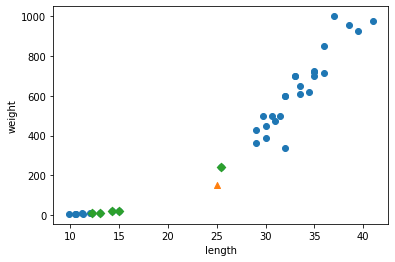

In [18]:
# 바라보는 이웃의 샘플을 뽑는 메서드 kneighbors 활용
# 25,150 도미를 넣어 가장 가까운 거리의 이웃샘플 5개까지 거리와 distances, 인덱스 indexes 를 반환해줌
distances, indexes = kn.kneighbors([[25, 150]])

# 보기 좋게 산점도를 활용해서 시각화된 그래프를 봐보자

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
                  # 해당 데이터를 쉽게 식별하기 위해 산점도에 세모로 표기
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
# indexes를 이용해 25,150 도미와 가장 근접한 5개의 샘플의 값을 쉽게 식별하기 위해 산점도에 마름모로 표기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 가장 가까운 이웃(초록색 마름모)들의 위치가 보인다
# 눈에 보이는 것과 다르게 더 멀리 떨어져있는 것 같은 빙어들이 가장 가까운 이웃으로 4개나 될까?

# 그 이유는 x축과 y축의 최솟값과 최댓값(전체적인 수치의 스케일) 때문이다

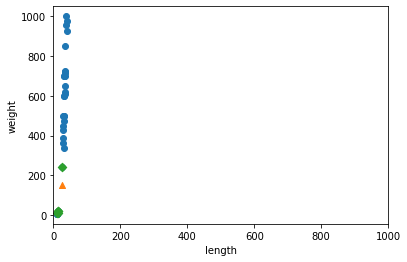

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

# 그래서 x축과 y축의 스케일을 맞추었다
plt.xlim(0, 1000)
# x축의 범위를 0부터 1000까지

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 이렇게 보면 왜 위에서 최근접이웃에 빙어 데이터가 4개나 들어가 있었는지 알 수 있었음
# k-최근접 이웃 알고리즘의 경우, 스케일에 영향을 받으므로 x축과 y축의 범위를 표준화 시켜야 함

In [23]:
# 표준 점수로 바꾸기

# 평균값 구하기
mean = np.mean(train_input, axis=0)

# 표준편차 구하기
std = np.std(train_input, axis=0)

# axis = 0 : 각 열마다 값을 구함 (각 특성마다 값을 구함)
# axis = 1 : 각 행마다 값을 구함 (각 샘플마다 값을 구함)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [25]:
train_input.shape

(36, 2)

In [26]:
# 특성 - 평균 / 표준편차

train_scaled = (train_input - mean) / std
# train_input 값 36개에 대해 각 행마다 평균값(mean)을 빼준 뒤 std 값 만큼 나누어줌
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

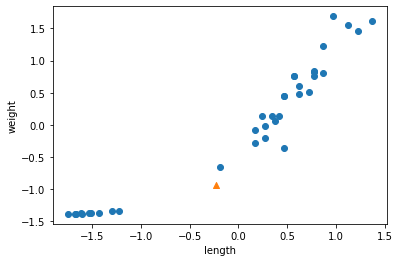

In [27]:
# 25, 150 의 도미 다시 표기
new = ([25, 150] - mean) / std
# 앞서 train_input 데이터가 전처리 된 것과 같이 25,150 도미의 값도 전처리 해줌

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
# 전처리 데이터에서 모델 훈련

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [29]:
# 훈련된 모델에 25,150 도미를 전처리한 new값을 주입
print(kn.predict([new]))

[1.]


In [30]:
# 이번엔 빙어가 아닌 도미로 정확히 예측을 했다

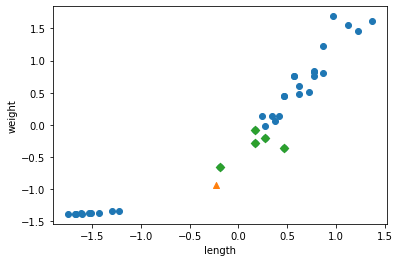

In [32]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
# new[0] = 25
# new[1] = 150
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 이번엔 최근접 이웃이 모두 도미로만 되어 있음을 알 수 있음 